<a href="https://colab.research.google.com/github/OmniaKhalafAllah/SN-bootcamp-projects/blob/main/Omnia_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import Libraries
#Import the usual libraries for pandas and plotting. You can import sklearn later on.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#Get the Data
#Use pandas to read loan_data.csv as a dataframe called loans.

from google.colab import files
uploaded = files.upload()

Saving loan_data.csv to loan_data.csv


In [ ]:
loans = pd.read_csv('loan_data.csv')

In [ ]:
#Check out the info(), head(), and describe() methods on loans.

loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [ ]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


Text(0.5, 0, 'FICO')

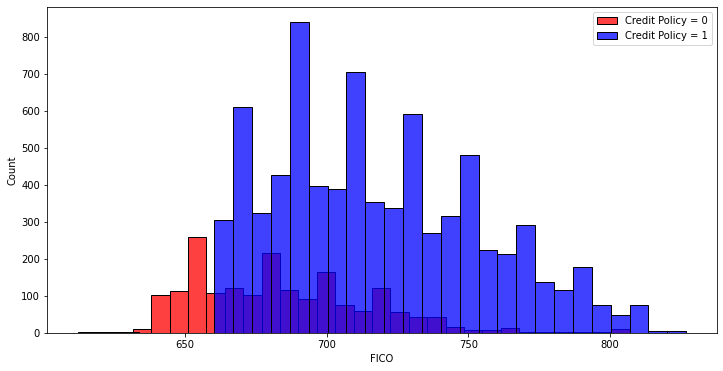

In [ ]:
#Exploratory Data Analysis
#Let's do some data visualization! We'll use seaborn and pandas built-in plotting capabilities, but feel free to use whatever library you want. Don't worry about the colors matching, just worry about getting the main idea of the plot.

#Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.

#Note: This is pretty tricky, feel free to reference the solutions. You'll probably need one line of code for each histogram, I also recommend just using pandas built in .hist()

plt.subplots(figsize = (12,6))
sns.histplot(loans[loans['credit.policy'] == 0]['fico'], bins = 30, kde = False, color = 'red', label = 'Credit Policy = 0')
sns.histplot(loans[loans['credit.policy'] == 1]['fico'], bins = 30, kde = False, color = 'blue', label = 'Credit Policy = 1')
plt.legend(loc = 1)
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

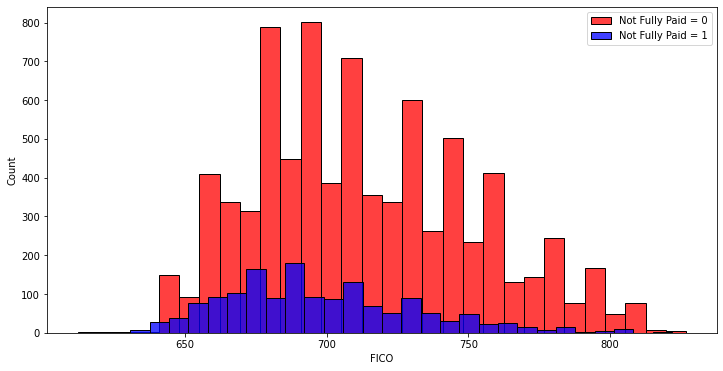

In [ ]:
#Create a similar figure, except this time select by the not.fully.paid column.

plt.subplots(figsize = (12,6))
sns.histplot(loans[loans['not.fully.paid'] == 0]['fico'], bins = 30, kde = False, color = 'red', label = 'Not Fully Paid = 0')
sns.histplot(loans[loans['not.fully.paid'] == 1]['fico'], bins = 30, kde = False, color = 'blue', label = 'Not Fully Paid = 1')
plt.legend(loc = 1)
plt.xlabel('FICO')

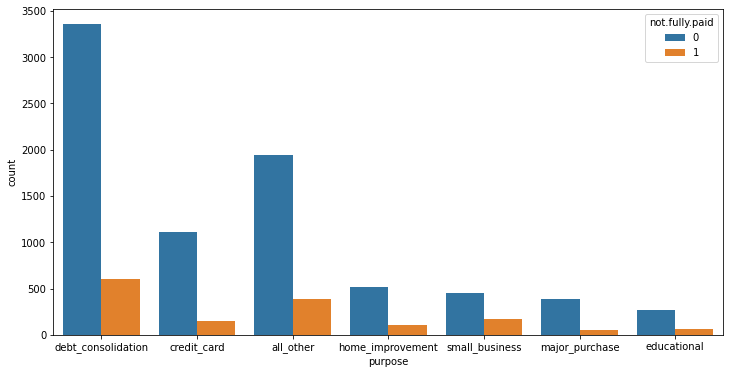

In [ ]:
#Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid.

plt.subplots(figsize = (12,6))
sns.countplot(x = 'purpose', hue = 'not.fully.paid', data = loans)

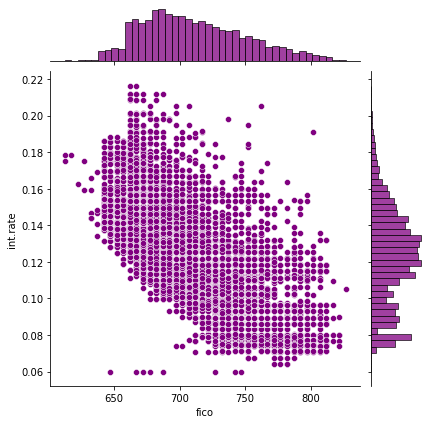

In [ ]:
#Let's see the trend between FICO score and interest rate. Recreate the following jointplot.

sns.jointplot(x = 'fico', y = 'int.rate',color='purple' ,data = loans)

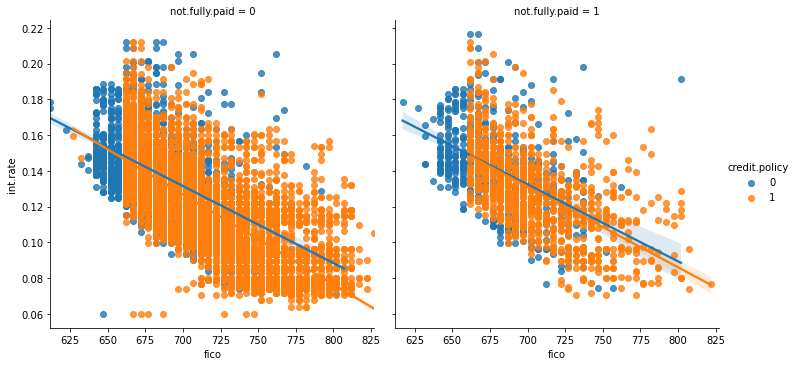

In [ ]:
#Create the following lmplots to see if the trend differed between not.fully.paid and credit.policy. Check the documentation for lmplot() if you can't figure out how to separate it into columns.

sns.lmplot(x = 'fico', y = 'int.rate', col = 'not.fully.paid', hue = 'credit.policy', data = loans)

In [ ]:
#Setting up the Data
#Let's get ready to set up our data for our Random Forest Classification Model!

#Check loans.info() again.

loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [ ]:
#Categorical Features
#Notice that the purpose column as categorical

#That means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies.
#Let's show you a way of dealing with these columns that can be expanded to multiple categorical features if necessary.
#Create a list of 1 element containing the string 'purpose'. Call this list cat_feats.

cat_feats = ['purpose']

In [ ]:
#Now use pd.get_dummies(loans,columns=cat_feats,drop_first=True) to create a fixed larger dataframe that has new feature columns with dummy variables. Set this dataframe as final_data.

final_data = pd.get_dummies(loans, columns = cat_feats, drop_first = True)
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [ ]:
#Train Test Split
#Now its time to split our data into a training set and a testing set!

#Use sklearn to split your data into a training set and a testing set as we've done in the past.

from sklearn.model_selection import train_test_split
X = final_data.drop('not.fully.paid', axis = 1)
y = final_data['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state= 0)

In [ ]:
#Training a Decision Tree Model
#Let's start by training a single decision tree first!

#Import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [ ]:
#Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#Predictions and Evaluation of Decision Tree
#Create predictions from the test set and create a classification report and a confusion matrix.

y_predict = dtree.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1615
           1       0.19      0.22      0.21       301

    accuracy                           0.73      1916
   macro avg       0.52      0.53      0.52      1916
weighted avg       0.75      0.73      0.74      1916



In [ ]:
print(confusion_matrix(y_test, y_predict))

[[1342  273]
 [ 235   66]]


In [ ]:
#Training the Random Forest model
#Now its time to train our model!

#Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.

from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 500)
RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#Predictions and Evaluation
#Let's predict off the y_test values and evaluate our model.

#Predict the class of not.fully.paid for the X_test data.
y_predict = RF.predict(X_test)

**Now create a classification report from the results. Do you get anything strange or some sort of warning?**

In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.85      1.00      0.91      1615
           1       0.50      0.02      0.04       301

    accuracy                           0.84      1916
   macro avg       0.67      0.51      0.48      1916
weighted avg       0.79      0.84      0.78      1916



The precision of (0) is high compared to the precision of (1).

In [ ]:
#Show the Confusion Matrix for the predictions.
print(confusion_matrix(y_test,y_predict))

[[1609    6]
 [ 295    6]]


**What performed better the random forest or the decision tree?**

Random Forest is better.